In [2]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv('train.csv', encoding='euc-kr')
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


* datetime컬럼 날짜 시간 형태로 분리

In [5]:
train = pd.read_csv('train.csv', encoding='euc-kr', parse_dates=["datetime"])
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [6]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train.shape

(10886, 18)

In [7]:
test = pd.read_csv('test.csv', encoding='euc-kr', parse_dates=["datetime"])
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [8]:
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second
test.shape

(6493, 15)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
 9   year        6493 non-null   int64         
 10  month       6493 non-null   int64         
 11  day         6493 non-null   int64         
 12  hour        6493 non-null   int64         
 13  minute      6493 non-null   int64         
 14  second      6493 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(11)
memory usage: 761.0 KB


In [11]:
train.head(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,0,0
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,1,1,6,0,0
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,1,1,7,0,0
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011,1,1,8,0,0
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011,1,1,9,0,0


In [12]:
test.head(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0
5,2011-01-20 05:00:00,1,0,1,1,9.84,11.365,60,15.0013,2011,1,20,5,0,0
6,2011-01-20 06:00:00,1,0,1,1,9.02,10.605,60,15.0013,2011,1,20,6,0,0
7,2011-01-20 07:00:00,1,0,1,1,9.02,10.605,55,15.0013,2011,1,20,7,0,0
8,2011-01-20 08:00:00,1,0,1,1,9.02,10.605,55,19.0012,2011,1,20,8,0,0
9,2011-01-20 09:00:00,1,0,1,2,9.84,11.365,52,15.0013,2011,1,20,9,0,0


In [13]:
train['season'].value_counts()
# 1 : 봄

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

In [14]:
train['holiday'].value_counts()
# 1 : 공휴일

0    10575
1      311
Name: holiday, dtype: int64

In [15]:
train['workingday'].head(60)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    1
48    1
49    1
50    1
51    1
52    1
53    1
54    1
55    1
56    1
57    1
58    1
59    1
Name: workingday, dtype: int64

In [16]:
train['workingday'].value_counts()
# 1 : 주중

1    7412
0    3474
Name: workingday, dtype: int64

In [17]:
train['weather'].value_counts()
# 어엉?

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [18]:
train['windspeed'].value_counts()
# 0은 측정 되지않은 값인거 같다 - 결측치 대체값

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
50.0021       1
51.9987       1
Name: windspeed, dtype: int64

In [19]:
test['windspeed'].value_counts()
# 0은 측정 되지않은 값인거 같다 - 결측치 대체값

0.0000     867
11.0014    638
8.9981     618
12.9980    615
7.0015     583
6.0032     553
15.0013    552
16.9979    471
19.0012    372
19.9995    316
22.0028    230
23.9994    186
26.0027    146
27.9993    109
30.0026     65
31.0009     57
32.9975     32
35.0008     26
39.0007     17
36.9974     17
40.9973     12
43.9989      3
46.0022      2
43.0006      2
54.0020      2
50.0021      1
55.9986      1
Name: windspeed, dtype: int64

In [20]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [21]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0


In [22]:
train = train.iloc[:, 1:]
train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


In [23]:
test = test.iloc[:, 1:13]
test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,19
6489,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,20
6490,1,0,1,1,10.66,12.880,60,11.0014,2012,12,31,21
6491,1,0,1,1,10.66,13.635,56,8.9981,2012,12,31,22


In [24]:
train.shape

(10886, 17)

* 연속형, 범주형 구분
* 연속형 : temp, atemp, humidity, windspeed, casual, registered
* 범주형 : holiday, workingday, weather, year, month, day, hour, minute, second

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  year        10886 non-null  int64  
 12  month       10886 non-null  int64  
 13  day         10886 non-null  int64  
 14  hour        10886 non-null  int64  
 15  minute      10886 non-null  int64  
 16  second      10886 non-null  int64  
dtypes: float64(3), int64(14)
memory usage: 1.4 MB


In [26]:
#labelencoder
train['season'] = train['season'].astype('category')
train['holiday'] = train['holiday'].astype('category')
train['workingday'] = train['workingday'].astype('category')
train['weather'] = train['weather'].astype('category')
train['year'] = train['year'].astype('category')
train['month'] = train['month'].astype('category')
train['day'] = train['day'].astype('category')
train['hour'] = train['hour'].astype('category')
pd.get_dummies(train['holiday'])

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
10881,1,0
10882,1,0
10883,1,0
10884,1,0


In [27]:
#labelencoder
test['season'] = test['season'].astype('category')
test['holiday'] = test['holiday'].astype('category')
test['workingday'] = test['workingday'].astype('category')
test['weather'] = test['weather'].astype('category')
test['year'] = test['year'].astype('category')
test['month'] = test['month'].astype('category')
test['day'] = test['day'].astype('category')
test['hour'] = test['hour'].astype('category')
pd.get_dummies(test['holiday'])

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
6488,1,0
6489,1,0
6490,1,0
6491,1,0


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10886 non-null  category
 1   holiday     10886 non-null  category
 2   workingday  10886 non-null  category
 3   weather     10886 non-null  category
 4   temp        10886 non-null  float64 
 5   atemp       10886 non-null  float64 
 6   humidity    10886 non-null  int64   
 7   windspeed   10886 non-null  float64 
 8   casual      10886 non-null  int64   
 9   registered  10886 non-null  int64   
 10  count       10886 non-null  int64   
 11  year        10886 non-null  category
 12  month       10886 non-null  category
 13  day         10886 non-null  category
 14  hour        10886 non-null  category
 15  minute      10886 non-null  int64   
 16  second      10886 non-null  int64   
dtypes: category(8), float64(3), int64(6)
memory usage: 853.2 KB


In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      6493 non-null   category
 1   holiday     6493 non-null   category
 2   workingday  6493 non-null   category
 3   weather     6493 non-null   category
 4   temp        6493 non-null   float64 
 5   atemp       6493 non-null   float64 
 6   humidity    6493 non-null   int64   
 7   windspeed   6493 non-null   float64 
 8   year        6493 non-null   category
 9   month       6493 non-null   category
 10  day         6493 non-null   category
 11  hour        6493 non-null   category
dtypes: category(8), float64(3), int64(1)
memory usage: 256.0 KB


In [30]:
train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


In [31]:
test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,19
6489,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,20
6490,1,0,1,1,10.66,12.880,60,11.0014,2012,12,31,21
6491,1,0,1,1,10.66,13.635,56,8.9981,2012,12,31,22


* windspeed 결측치를 예측해보기

In [32]:
train.isnull().sum() # 널값 없음

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
minute        0
second        0
dtype: int64

In [33]:
train.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
minute        0
second        0
dtype: int64

In [34]:
train.shape

(10886, 17)

In [35]:
train.head(20)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
5,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,0,0
6,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,1,1,6,0,0
7,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,1,1,7,0,0
8,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011,1,1,8,0,0
9,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011,1,1,9,0,0


* 풍속을 예측하는데 독립변수로
* season, weather, temp, atemp, humidity, year, month, day, hour로 설정
* year가 애매하긴한데 나중에 다시 확인해보기

In [36]:
train['minute'].value_counts()
#minute, second 다 0이니까 제거

0    10886
Name: minute, dtype: int64

In [37]:
train['second'].value_counts()

0    10886
Name: second, dtype: int64

In [38]:
train_d = train.drop('holiday', axis=1)
train_d = train_d.drop('workingday', axis=1)
train_d = train_d.drop('casual', axis=1)
train_d = train_d.drop('registered', axis=1)
train_d = train_d.drop('count', axis=1)
train_d = train_d.drop('minute', axis=1)
train_d = train_d.drop('second', axis=1)
train_d

,season,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,1,9.84,14.395,81,0.0000,2011,1,1,0
1,1,1,9.02,13.635,80,0.0000,2011,1,1,1
2,1,1,9.02,13.635,80,0.0000,2011,1,1,2
3,1,1,9.84,14.395,75,0.0000,2011,1,1,3
4,1,1,9.84,14.395,75,0.0000,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...
10881,4,1,15.58,19.695,50,26.0027,2012,12,19,19
10882,4,1,14.76,17.425,57,15.0013,2012,12,19,20
10883,4,1,13.94,15.910,61,15.0013,2012,12,19,21
10884,4,1,13.94,17.425,61,6.0032,2012,12,19,22


In [39]:
#holiday, workingday 빼줬음
test_a = test.drop('holiday', axis=1)
test_a = test_a.drop('workingday', axis=1)
test_a

,season,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,1,1,10.66,12.880,56,11.0014,2011,1,20,4
...,...,...,...,...,...,...,...,...,...,...
6488,1,2,10.66,12.880,60,11.0014,2012,12,31,19
6489,1,2,10.66,12.880,60,11.0014,2012,12,31,20
6490,1,1,10.66,12.880,60,11.0014,2012,12,31,21
6491,1,1,10.66,13.635,56,8.9981,2012,12,31,22


In [40]:
train_d.shape, test_a.shape

((10886, 10), (6493, 10))

In [41]:
#train 데이터셋
#X_d1 : windspeed가 0이 아닌 test데이터셋(windspeed predict)
X_d1 = train_d[train_d['windspeed'] != 0]
X_train = X_d1.drop('windspeed', axis=1)
X_train

,season,weather,temp,atemp,humidity,year,month,day,hour
5,1,2,9.84,12.880,75,2011,1,1,5
10,1,1,15.58,19.695,76,2011,1,1,10
11,1,1,14.76,16.665,81,2011,1,1,11
12,1,1,17.22,21.210,77,2011,1,1,12
13,1,2,18.86,22.725,72,2011,1,1,13
...,...,...,...,...,...,...,...,...,...
10881,4,1,15.58,19.695,50,2012,12,19,19
10882,4,1,14.76,17.425,57,2012,12,19,20
10883,4,1,13.94,15.910,61,2012,12,19,21
10884,4,1,13.94,17.425,61,2012,12,19,22


In [42]:
#train 데이터셋
#X_d2 : windspeed가 0인 test데이터셋(windspeed predict)
X_d2 = train_d[train_d['windspeed'] == 0]
X_test = X_d2.drop('windspeed', axis=1)
X_test

,season,weather,temp,atemp,humidity,year,month,day,hour
0,1,1,9.84,14.395,81,2011,1,1,0
1,1,1,9.02,13.635,80,2011,1,1,1
2,1,1,9.02,13.635,80,2011,1,1,2
3,1,1,9.84,14.395,75,2011,1,1,3
4,1,1,9.84,14.395,75,2011,1,1,4
...,...,...,...,...,...,...,...,...,...
10826,4,2,16.40,20.455,87,2012,12,17,12
10829,4,2,17.22,21.210,88,2012,12,17,15
10846,4,1,15.58,19.695,94,2012,12,18,8
10860,4,1,13.94,16.665,49,2012,12,18,22


In [43]:
#test데이터
#X_r1 : windspeed가 0이 아닌 train데이터셋(windspeed predict)
X_r1 = test_a[test_a['windspeed'] != 0]
R_train = X_r1.drop('windspeed', axis=1)
R_train

,season,weather,temp,atemp,humidity,year,month,day,hour
0,1,1,10.66,11.365,56,2011,1,20,0
3,1,1,10.66,12.880,56,2011,1,20,3
4,1,1,10.66,12.880,56,2011,1,20,4
5,1,1,9.84,11.365,60,2011,1,20,5
6,1,1,9.02,10.605,60,2011,1,20,6
...,...,...,...,...,...,...,...,...,...
6488,1,2,10.66,12.880,60,2012,12,31,19
6489,1,2,10.66,12.880,60,2012,12,31,20
6490,1,1,10.66,12.880,60,2012,12,31,21
6491,1,1,10.66,13.635,56,2012,12,31,22


In [44]:
#test데이터
#X_r2 : windspeed가 0인 test데이터셋(windspeed predict)
X_r2 = test_a[test_a['windspeed'] == 0]
R_test = X_r2.drop('windspeed', axis=1)
R_test

,season,weather,temp,atemp,humidity,year,month,day,hour
1,1,1,10.66,13.635,56,2011,1,20,1
2,1,1,10.66,13.635,56,2011,1,20,2
12,1,2,12.30,16.665,42,2011,1,20,12
60,1,1,3.28,8.335,35,2011,1,22,13
62,1,1,4.92,7.575,28,2011,1,22,15
...,...,...,...,...,...,...,...,...,...
6433,1,3,8.20,12.120,100,2012,12,29,12
6434,1,3,8.20,12.120,100,2012,12,29,13
6436,1,2,9.84,12.120,87,2012,12,29,15
6444,1,2,10.66,12.120,60,2012,12,29,23


In [45]:
Y_train = X_d1['windspeed']
Y_train

5         6.0032
10       16.9979
11       19.0012
12       19.0012
13       19.9995
          ...   
10881    26.0027
10882    15.0013
10883    15.0013
10884     6.0032
10885     8.9981
Name: windspeed, Length: 9573, dtype: float64

In [46]:
S_train = X_r1['windspeed']
S_train

0       26.0027
3       11.0014
4       11.0014
5       15.0013
6       15.0013
         ...   
6488    11.0014
6489    11.0014
6490    11.0014
6491     8.9981
6492     8.9981
Name: windspeed, Length: 5626, dtype: float64

In [47]:
Y_train.shape

(9573,)

In [48]:
Y_test = X_d2['windspeed']
Y_test

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10826    0.0
10829    0.0
10846    0.0
10860    0.0
10862    0.0
Name: windspeed, Length: 1313, dtype: float64

In [49]:
S_test = X_r2['windspeed']
S_test

1       0.0
2       0.0
12      0.0
60      0.0
62      0.0
       ... 
6433    0.0
6434    0.0
6436    0.0
6444    0.0
6464    0.0
Name: windspeed, Length: 867, dtype: float64

In [50]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### RandomForest

In [51]:
from sklearn.ensemble import RandomForestRegressor
max_depth_list = []
rf = RandomForestRegressor(n_estimators=100,
                              n_jobs=-1,
                              random_state=0)
rf

RandomForestRegressor(n_jobs=-1, random_state=0)

In [52]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

# 구분 잘해놓기

* train 데이터셋 'windspeed' 예측

In [53]:
%time score = cross_val_score(rf, X_train, Y_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

Wall time: 7.36 s
Score= 0.30574


* test 데이터셋 'windspeed' 예측

In [54]:
#test 데이터셋
%time score = cross_val_score(rf, R_train, S_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

Wall time: 4.81 s
Score= 0.29223


In [55]:
# 학습시킴, 피팅(옷을 맞출 때 사용하는 피팅을 생각함) - 피처와 레이블을 넣어주면 알아서 학습을 함
rf.fit(X_train, Y_train)

RandomForestRegressor(n_jobs=-1, random_state=0)

In [56]:
# 학습시킴, 피팅(옷을 맞출 때 사용하는 피팅을 생각함) - 피처와 레이블을 넣어주면 알아서 학습을 함
rf.fit(R_train, S_train)

RandomForestRegressor(n_jobs=-1, random_state=0)

In [57]:
# 예측
Y_pred_rf = rf.predict(X_test)

print(Y_pred_rf.shape)
Y_pred_rf[0:10]

(1313,)


array([11.670596, 10.430828, 10.270966, 10.951016, 10.591293, 11.07108 ,
        9.491354, 12.410946, 13.000613,  9.081582])

In [58]:
# 예측
S_pred_rf_test = rf.predict(R_test)

print(S_pred_rf_test.shape)
S_pred_rf_test[0:10]

(867,)


array([11.309801, 11.149738,  7.751096, 10.779965, 17.339131, 17.309048,
       12.100937,  8.410912,  9.80076 , 11.429463])

[Text(0.5, 1.0, 'test')]

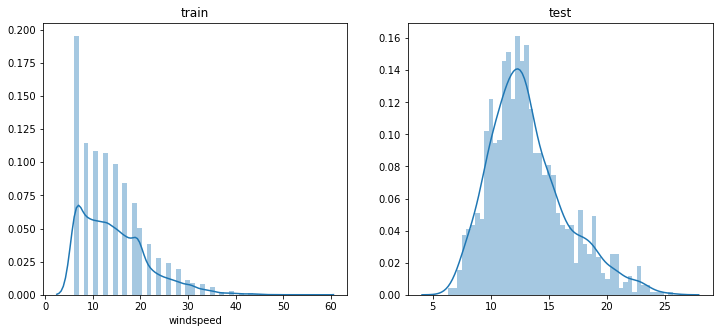

In [59]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(Y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(Y_pred_rf,ax=ax2,bins=50)
ax2.set(title="test")

[Text(0.5, 1.0, 'test')]

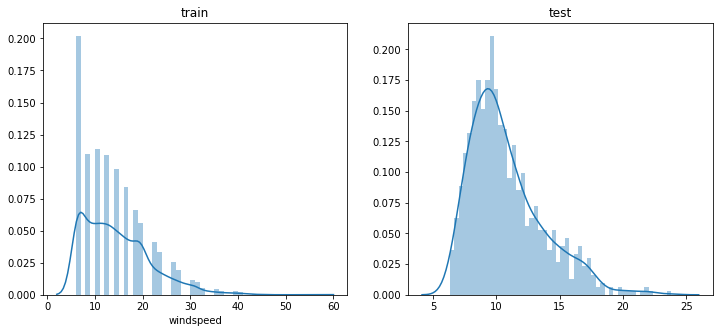

In [60]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(S_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(S_pred_rf_test,ax=ax2,bins=50)
ax2.set(title="test")

### LinearRegression

* train 데이터셋

In [61]:
#train 데이터셋
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
%time score = cross_val_score(lr, X_train, Y_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
print("Score= {0:.5f}".format(score))

Wall time: 162 ms
Score= 0.41341


* test 데이터셋

In [62]:
lr = LinearRegression()
%time score = cross_val_score(lr, R_train, S_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
print("Score= {0:.5f}".format(score))

Wall time: 145 ms
Score= 0.41923


In [63]:
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)
Y_pred_lr

array([10.64374721, 10.75834189, 10.79943653, ...,  7.79901658,
       15.19265623, 12.10039807])

In [64]:
lr.fit(R_train, S_train)
S_pred_lr = lr.predict(R_test)
S_pred_lr

array([14.48496073, 14.51797008, 16.41933165, 13.18186332, 17.61812232,
       14.46822317, 11.75276758, 10.85904175, 10.97172722, 12.0793829 ,
       15.59742927, 15.85005343, 16.40180658, 16.43481593, 14.15891503,
       12.842872  , 10.23060241,  9.32855781, 11.68514931,  7.93911102,
        8.16156341,  6.5781598 ,  6.61116915,  7.41254692,  7.47856561,
        9.30174141, 10.18279531, 10.41231565,  9.58994718, 12.57946408,
       12.61247343, 12.55873873, 18.64562564, 17.09829836, 15.72736063,
       17.20056038, 13.36752389, 10.73344998, 13.65960144, 16.8585344 ,
       15.69347308, 13.53052299, 13.56353234, 12.12765788,  9.60213237,
        9.63514172, 11.34513899, 13.39076718, 13.92859758,  8.50967605,
        8.77220574, 14.87174532, 10.51545148, 16.27133099, 16.37009372,
       17.03161378, 17.07460964, 13.88840313, 15.92588495, 17.24292685,
       19.05585083, 14.26585054, 13.53049148, 13.45860666, 13.67725407,
       13.52462536, 14.43577004, 13.59064406,  9.31544163,  9.63

[Text(0.5, 1.0, 'test')]

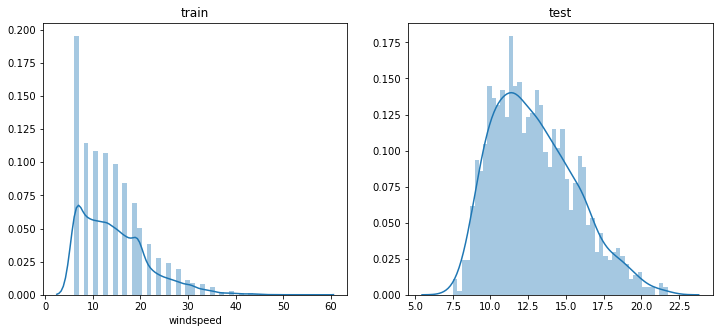

In [65]:
warnings.filterwarnings('ignore')
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(Y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(Y_pred_lr,ax=ax2,bins=50)
ax2.set(title="test")

[Text(0.5, 1.0, 'test')]

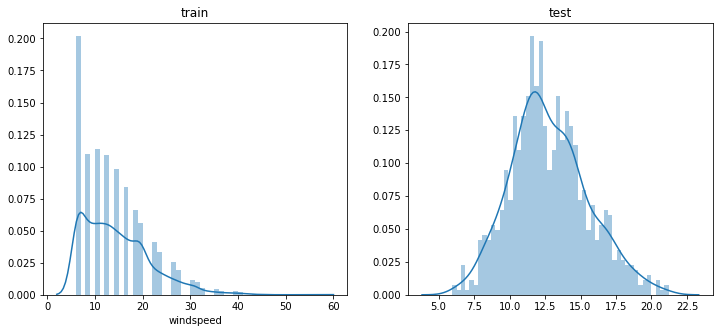

In [66]:
warnings.filterwarnings('ignore')
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(S_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(S_pred_lr,ax=ax2,bins=50)
ax2.set(title="test")

### Lasso

In [67]:
from sklearn.linear_model import Lasso
 
la=Lasso() # LASSO 모형 설정
%time score = cross_val_score(la, X_train, Y_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
print("Score= {0:.5f}".format(score))

Wall time: 185 ms
Score= 0.42499


In [68]:
%time score = cross_val_score(la, R_train, S_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
print("Score= {0:.5f}".format(score))

Wall time: 145 ms
Score= 0.43639


In [69]:
la.fit(X_train, Y_train)
Y_pred_la = la.predict(X_test)
Y_pred_la

array([12.58833646, 12.77177397, 12.80502833, ..., 10.54966917,
       16.31275397, 14.24173182])

In [70]:
la.fit(R_train, S_train)
S_pred_la = la.predict(R_test)
S_pred_la

array([15.56459157, 15.59704004, 16.98231148, 18.18039378, 18.92247659,
       18.84058103, 17.2651733 , 16.9659358 , 16.85961054, 17.56122613,
       17.55265498, 16.77800233, 17.03061851, 17.06306697, 16.87534773,
       13.83277299, 13.37552505, 13.89766992, 15.6757872 , 13.60645118,
       13.58986128, 12.50478844, 12.53723691, 13.19783289, 13.26272982,
       13.29517828, 13.81700053, 13.80073325, 14.1841044 , 15.82336185,
       15.85581031, 15.83123693, 18.18131961, 17.14414508, 16.23822034,
       17.19583027, 14.98333043, 15.31766321, 17.34110925, 18.53985233,
       18.01706896, 16.88240537, 16.91485383, 11.96738823, 11.37168918,
       11.40413764, 15.36789246, 15.38375102, 16.68065694, 12.8959994 ,
       12.91218058, 16.27282081, 12.0809148 , 16.59917011, 17.53713459,
       17.87948612, 17.71619659, 13.03194735, 16.62322637, 17.82998821,
       18.70332081, 17.17659355, 16.5808945 , 15.19786115, 16.84554608,
       15.26275808, 16.01308942, 15.32765501, 11.73077429, 11.81

[Text(0.5, 1.0, 'test')]

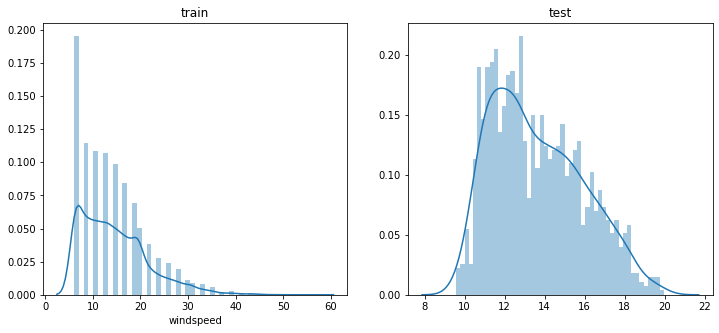

In [71]:
warnings.filterwarnings('ignore')
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(Y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(Y_pred_la,ax=ax2,bins=50)
ax2.set(title="test")

[Text(0.5, 1.0, 'test')]

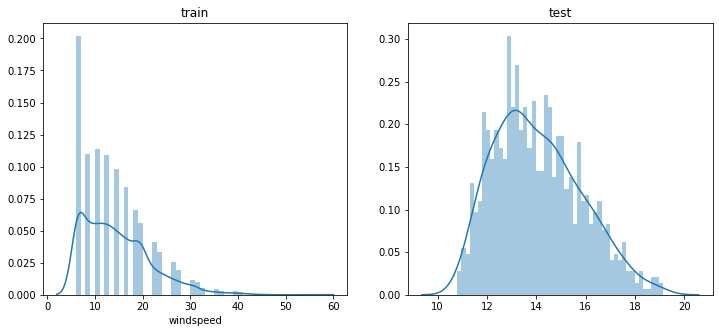

In [72]:
warnings.filterwarnings('ignore')
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(S_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(S_pred_la,ax=ax2,bins=50)
ax2.set(title="test")

### ElasticNet

In [73]:
from sklearn.linear_model import ElasticNet
el = ElasticNet(alpha=0.1, l1_ratio=0.5)
%time score = cross_val_score(el, X_train, Y_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
print("Score= {0:.5f}".format(score))

Wall time: 308 ms
Score= 0.41425


In [74]:
%time score = cross_val_score(el, R_train, S_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
print("Score= {0:.5f}".format(score))

Wall time: 359 ms
Score= 0.41939


In [75]:
el.fit(X_train,Y_train)
Y_pred_el = el.predict(X_test)
Y_pred_el

array([10.95552624, 11.07951638, 11.12306777, ...,  8.29058455,
       15.40625206, 12.39688734])

In [76]:
el.fit(R_train,S_train)
S_pred_el = el.predict(R_test)
S_pred_el

array([14.66253706, 14.69922834, 16.42664742, 13.92511411, 17.83785279,
       15.11970815, 12.63286935, 11.765456  , 11.85087153, 12.88666748,
       15.9172506 , 15.91392072, 16.41900078, 16.45569206, 14.58675702,
       12.88944508, 10.69962642, 10.08835258, 12.32273473,  8.8026071 ,
        8.99293876,  7.51207993,  7.5487712 ,  8.3198754 ,  8.39325795,
        9.86718675, 10.68701521, 10.8834821 , 10.32093253, 13.08793616,
       13.12462743, 12.98274693, 18.56463688, 17.03583055, 15.75866876,
       17.06068605, 13.6684879 , 11.43823266, 14.1786724 , 17.07258567,
       16.02991443, 14.05636337, 14.09305465, 11.95738334,  9.82242416,
        9.85911544, 11.93054375, 13.59480421, 14.31457412,  9.19717639,
        9.43033455, 15.06410026, 10.70056129, 16.19663071, 16.49673609,
       17.10673229, 17.13005819, 13.7244862 , 16.05673923, 17.33758149,
       18.89119492, 14.71419142, 14.01646976, 13.59312238, 14.08106652,
       13.66650493, 14.54252527, 13.73988748,  9.71562805, 10.01

[Text(0.5, 1.0, 'test')]

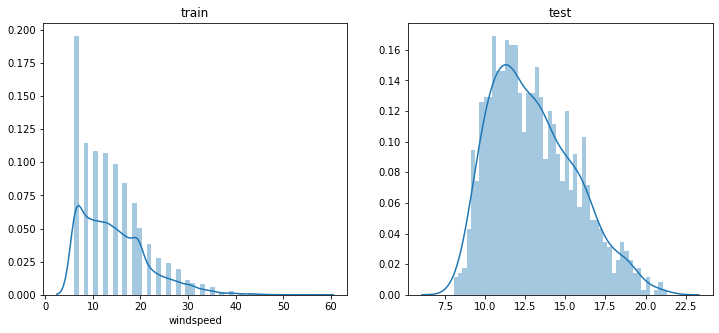

In [77]:
warnings.filterwarnings('ignore')
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(Y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(Y_pred_el,ax=ax2,bins=50)
ax2.set(title="test")

[Text(0.5, 1.0, 'test')]

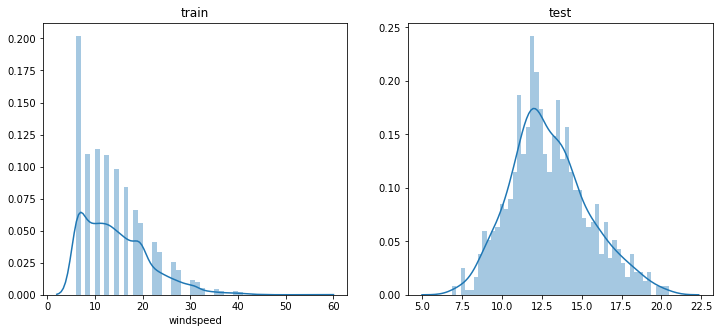

In [78]:
warnings.filterwarnings('ignore')
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(S_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(S_pred_el,ax=ax2,bins=50)
ax2.set(title="test")

### train set
* RandomForest, LinearRegressor, Lasso, ElasticNet 중 RandomForest 모델이 가장 적합
* windspeed 컬럼을 RandomForest 모델을 이용하여 대체

### test set
* RandomForest, LinearRegressor, Lasso, ElasticNet 중 RandomForest 모델이 가장 적합
* windspeed 컬럼을 RandomForest 모델을 이용하여 대체

* 그렇다면(train set), X_t에는 ['windspeed'] == 0 인 데이터 넣기
* 그렇다면(test set), R_t에는 ['windspeed'] == 0 인 데이터 넣기

In [79]:
#train 데이터셋
X_d2 = train_d[train_d['windspeed'] == 0]
X_t = X_d2.drop('windspeed', axis=1)
X_t

,season,weather,temp,atemp,humidity,year,month,day,hour
0,1,1,9.84,14.395,81,2011,1,1,0
1,1,1,9.02,13.635,80,2011,1,1,1
2,1,1,9.02,13.635,80,2011,1,1,2
3,1,1,9.84,14.395,75,2011,1,1,3
4,1,1,9.84,14.395,75,2011,1,1,4
...,...,...,...,...,...,...,...,...,...
10826,4,2,16.40,20.455,87,2012,12,17,12
10829,4,2,17.22,21.210,88,2012,12,17,15
10846,4,1,15.58,19.695,94,2012,12,18,8
10860,4,1,13.94,16.665,49,2012,12,18,22


In [80]:
#test 데이터셋
X_rr2 = test_a[test_a['windspeed'] == 0]
R_t = X_rr2.drop('windspeed', axis=1)
R_t

,season,weather,temp,atemp,humidity,year,month,day,hour
1,1,1,10.66,13.635,56,2011,1,20,1
2,1,1,10.66,13.635,56,2011,1,20,2
12,1,2,12.30,16.665,42,2011,1,20,12
60,1,1,3.28,8.335,35,2011,1,22,13
62,1,1,4.92,7.575,28,2011,1,22,15
...,...,...,...,...,...,...,...,...,...
6433,1,3,8.20,12.120,100,2012,12,29,12
6434,1,3,8.20,12.120,100,2012,12,29,13
6436,1,2,9.84,12.120,87,2012,12,29,15
6444,1,2,10.66,12.120,60,2012,12,29,23


In [81]:
X_t.shape

(1313, 9)

In [82]:
R_t.shape

(867, 9)

In [83]:
Y_test = X_d2['windspeed']
Y_test

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10826    0.0
10829    0.0
10846    0.0
10860    0.0
10862    0.0
Name: windspeed, Length: 1313, dtype: float64

In [84]:
S_test = X_r2['windspeed']
S_test

1       0.0
2       0.0
12      0.0
60      0.0
62      0.0
       ... 
6433    0.0
6434    0.0
6436    0.0
6444    0.0
6464    0.0
Name: windspeed, Length: 867, dtype: float64

In [85]:
Y_test.shape, S_test.shape

((1313,), (867,))

In [86]:
# 예측
Y_test_pred_rf = rf.predict(X_test)

print(Y_test_pred_rf.shape)
Y_test_pred_rf[0:10]

(1313,)


array([11.670596, 10.430828, 10.270966, 10.951016, 10.591293, 11.07108 ,
        9.491354, 12.410946, 13.000613,  9.081582])

In [87]:
# 예측
S_test_pred_rf = rf.predict(R_test)

print(S_test_pred_rf.shape)
S_test_pred_rf[0:10]

(867,)


array([11.309801, 11.149738,  7.751096, 10.779965, 17.339131, 17.309048,
       12.100937,  8.410912,  9.80076 , 11.429463])

In [88]:
Y_test_pred_rf.shape, S_test_pred_rf.shape

((1313,), (867,))

In [89]:
train_d

,season,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,1,9.84,14.395,81,0.0000,2011,1,1,0
1,1,1,9.02,13.635,80,0.0000,2011,1,1,1
2,1,1,9.02,13.635,80,0.0000,2011,1,1,2
3,1,1,9.84,14.395,75,0.0000,2011,1,1,3
4,1,1,9.84,14.395,75,0.0000,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...
10881,4,1,15.58,19.695,50,26.0027,2012,12,19,19
10882,4,1,14.76,17.425,57,15.0013,2012,12,19,20
10883,4,1,13.94,15.910,61,15.0013,2012,12,19,21
10884,4,1,13.94,17.425,61,6.0032,2012,12,19,22


In [90]:
test_a

,season,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,1,1,10.66,12.880,56,11.0014,2011,1,20,4
...,...,...,...,...,...,...,...,...,...,...
6488,1,2,10.66,12.880,60,11.0014,2012,12,31,19
6489,1,2,10.66,12.880,60,11.0014,2012,12,31,20
6490,1,1,10.66,12.880,60,11.0014,2012,12,31,21
6491,1,1,10.66,13.635,56,8.9981,2012,12,31,22


In [91]:
X_t
# 여기다가 Y_test 붙이고 concat

,season,weather,temp,atemp,humidity,year,month,day,hour
0,1,1,9.84,14.395,81,2011,1,1,0
1,1,1,9.02,13.635,80,2011,1,1,1
2,1,1,9.02,13.635,80,2011,1,1,2
3,1,1,9.84,14.395,75,2011,1,1,3
4,1,1,9.84,14.395,75,2011,1,1,4
...,...,...,...,...,...,...,...,...,...
10826,4,2,16.40,20.455,87,2012,12,17,12
10829,4,2,17.22,21.210,88,2012,12,17,15
10846,4,1,15.58,19.695,94,2012,12,18,8
10860,4,1,13.94,16.665,49,2012,12,18,22


In [92]:
R_t
# 여기다가 S_test 붙이고 'holiday','workingday' concat

,season,weather,temp,atemp,humidity,year,month,day,hour
1,1,1,10.66,13.635,56,2011,1,20,1
2,1,1,10.66,13.635,56,2011,1,20,2
12,1,2,12.30,16.665,42,2011,1,20,12
60,1,1,3.28,8.335,35,2011,1,22,13
62,1,1,4.92,7.575,28,2011,1,22,15
...,...,...,...,...,...,...,...,...,...
6433,1,3,8.20,12.120,100,2012,12,29,12
6434,1,3,8.20,12.120,100,2012,12,29,13
6436,1,2,9.84,12.120,87,2012,12,29,15
6444,1,2,10.66,12.120,60,2012,12,29,23


In [93]:
X_t['windspeed'] = Y_test_pred_rf
X_t

,season,weather,temp,atemp,humidity,year,month,day,hour,windspeed
0,1,1,9.84,14.395,81,2011,1,1,0,11.670596
1,1,1,9.02,13.635,80,2011,1,1,1,10.430828
2,1,1,9.02,13.635,80,2011,1,1,2,10.270966
3,1,1,9.84,14.395,75,2011,1,1,3,10.951016
4,1,1,9.84,14.395,75,2011,1,1,4,10.591293
...,...,...,...,...,...,...,...,...,...,...
10826,4,2,16.40,20.455,87,2012,12,17,12,14.150534
10829,4,2,17.22,21.210,88,2012,12,17,15,15.390503
10846,4,1,15.58,19.695,94,2012,12,18,8,10.430962
10860,4,1,13.94,16.665,49,2012,12,18,22,15.740444


In [94]:
R_t['windspeed'] = S_test_pred_rf
R_t

,season,weather,temp,atemp,humidity,year,month,day,hour,windspeed
1,1,1,10.66,13.635,56,2011,1,20,1,11.309801
2,1,1,10.66,13.635,56,2011,1,20,2,11.149738
12,1,2,12.30,16.665,42,2011,1,20,12,7.751096
60,1,1,3.28,8.335,35,2011,1,22,13,10.779965
62,1,1,4.92,7.575,28,2011,1,22,15,17.339131
...,...,...,...,...,...,...,...,...,...,...
6433,1,3,8.20,12.120,100,2012,12,29,12,15.070712
6434,1,3,8.20,12.120,100,2012,12,29,13,15.170475
6436,1,2,9.84,12.120,87,2012,12,29,15,9.212098
6444,1,2,10.66,12.120,60,2012,12,29,23,21.850442


In [95]:
R_t['holiday'] = test[test['windspeed'] == 0]['holiday']
R_t['workingday'] = test[test['windspeed'] == 0]['workingday']
R_t

,season,weather,temp,atemp,humidity,year,month,day,hour,windspeed,holiday,workingday
1,1,1,10.66,13.635,56,2011,1,20,1,11.309801,0,1
2,1,1,10.66,13.635,56,2011,1,20,2,11.149738,0,1
12,1,2,12.30,16.665,42,2011,1,20,12,7.751096,0,1
60,1,1,3.28,8.335,35,2011,1,22,13,10.779965,0,0
62,1,1,4.92,7.575,28,2011,1,22,15,17.339131,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6433,1,3,8.20,12.120,100,2012,12,29,12,15.070712,0,0
6434,1,3,8.20,12.120,100,2012,12,29,13,15.170475,0,0
6436,1,2,9.84,12.120,87,2012,12,29,15,9.212098,0,0
6444,1,2,10.66,12.120,60,2012,12,29,23,21.850442,0,0


In [96]:
R_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 867 entries, 1 to 6464
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      867 non-null    category
 1   weather     867 non-null    category
 2   temp        867 non-null    float64 
 3   atemp       867 non-null    float64 
 4   humidity    867 non-null    int64   
 5   year        867 non-null    category
 6   month       867 non-null    category
 7   day         867 non-null    category
 8   hour        867 non-null    category
 9   windspeed   867 non-null    float64 
 10  holiday     867 non-null    category
 11  workingday  867 non-null    category
dtypes: category(8), float64(3), int64(1)
memory usage: 42.9 KB


In [97]:
X_r1['holiday'] = test[test['windspeed'] != 0]['holiday']
X_r1['workingday'] = test[test['windspeed'] != 0]['workingday']
X_r1

,season,weather,temp,atemp,humidity,windspeed,year,month,day,hour,holiday,workingday
0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,1
3,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,1
4,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,1
5,1,1,9.84,11.365,60,15.0013,2011,1,20,5,0,1
6,1,1,9.02,10.605,60,15.0013,2011,1,20,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1,2,10.66,12.880,60,11.0014,2012,12,31,19,0,1
6489,1,2,10.66,12.880,60,11.0014,2012,12,31,20,0,1
6490,1,1,10.66,12.880,60,11.0014,2012,12,31,21,0,1
6491,1,1,10.66,13.635,56,8.9981,2012,12,31,22,0,1


In [98]:
y_test = pd.concat([R_t, X_r1])
y_test

,season,weather,temp,atemp,humidity,year,month,day,hour,windspeed,holiday,workingday
1,1,1,10.66,13.635,56,2011,1,20,1,11.309801,0,1
2,1,1,10.66,13.635,56,2011,1,20,2,11.149738,0,1
12,1,2,12.30,16.665,42,2011,1,20,12,7.751096,0,1
60,1,1,3.28,8.335,35,2011,1,22,13,10.779965,0,0
62,1,1,4.92,7.575,28,2011,1,22,15,17.339131,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1,2,10.66,12.880,60,2012,12,31,19,11.001400,0,1
6489,1,2,10.66,12.880,60,2012,12,31,20,11.001400,0,1
6490,1,1,10.66,12.880,60,2012,12,31,21,11.001400,0,1
6491,1,1,10.66,13.635,56,2012,12,31,22,8.998100,0,1


In [99]:
# 컬럼 위치 조정
X_t = X_t[['season', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour']]
X_t

,season,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,1,9.84,14.395,81,11.670596,2011,1,1,0
1,1,1,9.02,13.635,80,10.430828,2011,1,1,1
2,1,1,9.02,13.635,80,10.270966,2011,1,1,2
3,1,1,9.84,14.395,75,10.951016,2011,1,1,3
4,1,1,9.84,14.395,75,10.591293,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...
10826,4,2,16.40,20.455,87,14.150534,2012,12,17,12
10829,4,2,17.22,21.210,88,15.390503,2012,12,17,15
10846,4,1,15.58,19.695,94,10.430962,2012,12,18,8
10860,4,1,13.94,16.665,49,15.740444,2012,12,18,22


## test dataset 전처리 끝

In [100]:
# 컬럼 위치 조정
y_test = y_test[['season','holiday','workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour']]
y_test
#test dataset 확정

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
1,1,0,1,1,10.66,13.635,56,11.309801,2011,1,20,1
2,1,0,1,1,10.66,13.635,56,11.149738,2011,1,20,2
12,1,0,1,2,12.30,16.665,42,7.751096,2011,1,20,12
60,1,0,0,1,3.28,8.335,35,10.779965,2011,1,22,13
62,1,0,0,1,4.92,7.575,28,17.339131,2011,1,22,15
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.001400,2012,12,31,19
6489,1,0,1,2,10.66,12.880,60,11.001400,2012,12,31,20
6490,1,0,1,1,10.66,12.880,60,11.001400,2012,12,31,21
6491,1,0,1,1,10.66,13.635,56,8.998100,2012,12,31,22


In [101]:
y_test.shape

(6493, 12)

* X_t : windspeed == 0 이였는데 RandomForest로 예측하여 집어넣은 데이터 (본래 train dataset)
* R_t : windspeed == 0 이였는데 RandomForest로 예측하여 집어넣은 데이터 (본래 test dataset)

#### 드랍했던 'count' 컬럼 다시 원상복구

In [102]:
X_d1['count'] = train[train['windspeed'] != 0]['count']
X_d1

,season,weather,temp,atemp,humidity,windspeed,year,month,day,hour,count
5,1,2,9.84,12.880,75,6.0032,2011,1,1,5,1
10,1,1,15.58,19.695,76,16.9979,2011,1,1,10,36
11,1,1,14.76,16.665,81,19.0012,2011,1,1,11,56
12,1,1,17.22,21.210,77,19.0012,2011,1,1,12,84
13,1,2,18.86,22.725,72,19.9995,2011,1,1,13,94
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,1,15.58,19.695,50,26.0027,2012,12,19,19,336
10882,4,1,14.76,17.425,57,15.0013,2012,12,19,20,241
10883,4,1,13.94,15.910,61,15.0013,2012,12,19,21,168
10884,4,1,13.94,17.425,61,6.0032,2012,12,19,22,129


In [103]:
X_t['count'] = X_d_c = train[train['windspeed'] == 0]['count']
X_t

,season,weather,temp,atemp,humidity,windspeed,year,month,day,hour,count
0,1,1,9.84,14.395,81,11.670596,2011,1,1,0,16
1,1,1,9.02,13.635,80,10.430828,2011,1,1,1,40
2,1,1,9.02,13.635,80,10.270966,2011,1,1,2,32
3,1,1,9.84,14.395,75,10.951016,2011,1,1,3,13
4,1,1,9.84,14.395,75,10.591293,2011,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...
10826,4,2,16.40,20.455,87,14.150534,2012,12,17,12,232
10829,4,2,17.22,21.210,88,15.390503,2012,12,17,15,211
10846,4,1,15.58,19.695,94,10.430962,2012,12,18,8,662
10860,4,1,13.94,16.665,49,15.740444,2012,12,18,22,132


In [104]:
x_train = pd.concat([X_d1,X_t])
x_train

,season,weather,temp,atemp,humidity,windspeed,year,month,day,hour,count
5,1,2,9.84,12.880,75,6.003200,2011,1,1,5,1
10,1,1,15.58,19.695,76,16.997900,2011,1,1,10,36
11,1,1,14.76,16.665,81,19.001200,2011,1,1,11,56
12,1,1,17.22,21.210,77,19.001200,2011,1,1,12,84
13,1,2,18.86,22.725,72,19.999500,2011,1,1,13,94
...,...,...,...,...,...,...,...,...,...,...,...
10826,4,2,16.40,20.455,87,14.150534,2012,12,17,12,232
10829,4,2,17.22,21.210,88,15.390503,2012,12,17,15,211
10846,4,1,15.58,19.695,94,10.430962,2012,12,18,8,662
10860,4,1,13.94,16.665,49,15.740444,2012,12,18,22,132


* 종속변수를 'count'로 설정하고 독립변수로 설정할 수 있는 컬럼 다시 생각해보기

In [105]:
train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


In [106]:
#일단 데이터프레임에 넣어야 될게
#windspeed 예측할 때 상관없을거 같아서 뺐던 컬럼들
#holiday, workingday, casual, registered 2개씩 묶어서 넣어버리기

In [107]:
X_d1['holiday'] = train[train['windspeed'] != 0]['holiday']
X_d1

,season,weather,temp,atemp,humidity,windspeed,year,month,day,hour,count,holiday
5,1,2,9.84,12.880,75,6.0032,2011,1,1,5,1,0
10,1,1,15.58,19.695,76,16.9979,2011,1,1,10,36,0
11,1,1,14.76,16.665,81,19.0012,2011,1,1,11,56,0
12,1,1,17.22,21.210,77,19.0012,2011,1,1,12,84,0
13,1,2,18.86,22.725,72,19.9995,2011,1,1,13,94,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,1,15.58,19.695,50,26.0027,2012,12,19,19,336,0
10882,4,1,14.76,17.425,57,15.0013,2012,12,19,20,241,0
10883,4,1,13.94,15.910,61,15.0013,2012,12,19,21,168,0
10884,4,1,13.94,17.425,61,6.0032,2012,12,19,22,129,0


In [108]:
X_d1['workingday'] = train[train['windspeed'] != 0]['workingday']
X_d1

,season,weather,temp,atemp,humidity,windspeed,year,month,day,hour,count,holiday,workingday
5,1,2,9.84,12.880,75,6.0032,2011,1,1,5,1,0,0
10,1,1,15.58,19.695,76,16.9979,2011,1,1,10,36,0,0
11,1,1,14.76,16.665,81,19.0012,2011,1,1,11,56,0,0
12,1,1,17.22,21.210,77,19.0012,2011,1,1,12,84,0,0
13,1,2,18.86,22.725,72,19.9995,2011,1,1,13,94,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,1,15.58,19.695,50,26.0027,2012,12,19,19,336,0,1
10882,4,1,14.76,17.425,57,15.0013,2012,12,19,20,241,0,1
10883,4,1,13.94,15.910,61,15.0013,2012,12,19,21,168,0,1
10884,4,1,13.94,17.425,61,6.0032,2012,12,19,22,129,0,1


In [109]:
X_d1['casual'] = train[train['windspeed'] != 0]['casual']
X_d1

,season,weather,temp,atemp,humidity,windspeed,year,month,day,hour,count,holiday,workingday,casual
5,1,2,9.84,12.880,75,6.0032,2011,1,1,5,1,0,0,0
10,1,1,15.58,19.695,76,16.9979,2011,1,1,10,36,0,0,12
11,1,1,14.76,16.665,81,19.0012,2011,1,1,11,56,0,0,26
12,1,1,17.22,21.210,77,19.0012,2011,1,1,12,84,0,0,29
13,1,2,18.86,22.725,72,19.9995,2011,1,1,13,94,0,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,1,15.58,19.695,50,26.0027,2012,12,19,19,336,0,1,7
10882,4,1,14.76,17.425,57,15.0013,2012,12,19,20,241,0,1,10
10883,4,1,13.94,15.910,61,15.0013,2012,12,19,21,168,0,1,4
10884,4,1,13.94,17.425,61,6.0032,2012,12,19,22,129,0,1,12


In [110]:
X_d1['registered'] = train[train['windspeed'] != 0]['registered']
X_d1

,season,weather,temp,atemp,humidity,windspeed,year,month,day,hour,count,holiday,workingday,casual,registered
5,1,2,9.84,12.880,75,6.0032,2011,1,1,5,1,0,0,0,1
10,1,1,15.58,19.695,76,16.9979,2011,1,1,10,36,0,0,12,24
11,1,1,14.76,16.665,81,19.0012,2011,1,1,11,56,0,0,26,30
12,1,1,17.22,21.210,77,19.0012,2011,1,1,12,84,0,0,29,55
13,1,2,18.86,22.725,72,19.9995,2011,1,1,13,94,0,0,47,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,1,15.58,19.695,50,26.0027,2012,12,19,19,336,0,1,7,329
10882,4,1,14.76,17.425,57,15.0013,2012,12,19,20,241,0,1,10,231
10883,4,1,13.94,15.910,61,15.0013,2012,12,19,21,168,0,1,4,164
10884,4,1,13.94,17.425,61,6.0032,2012,12,19,22,129,0,1,12,117


In [111]:
X_t['holiday'] = X_d_c = train[train['windspeed'] == 0]['holiday']
X_t

,season,weather,temp,atemp,humidity,windspeed,year,month,day,hour,count,holiday
0,1,1,9.84,14.395,81,11.670596,2011,1,1,0,16,0
1,1,1,9.02,13.635,80,10.430828,2011,1,1,1,40,0
2,1,1,9.02,13.635,80,10.270966,2011,1,1,2,32,0
3,1,1,9.84,14.395,75,10.951016,2011,1,1,3,13,0
4,1,1,9.84,14.395,75,10.591293,2011,1,1,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10826,4,2,16.40,20.455,87,14.150534,2012,12,17,12,232,0
10829,4,2,17.22,21.210,88,15.390503,2012,12,17,15,211,0
10846,4,1,15.58,19.695,94,10.430962,2012,12,18,8,662,0
10860,4,1,13.94,16.665,49,15.740444,2012,12,18,22,132,0


In [112]:
X_t['workingday'] = X_d_c = train[train['windspeed'] == 0]['workingday']
X_t

,season,weather,temp,atemp,humidity,windspeed,year,month,day,hour,count,holiday,workingday
0,1,1,9.84,14.395,81,11.670596,2011,1,1,0,16,0,0
1,1,1,9.02,13.635,80,10.430828,2011,1,1,1,40,0,0
2,1,1,9.02,13.635,80,10.270966,2011,1,1,2,32,0,0
3,1,1,9.84,14.395,75,10.951016,2011,1,1,3,13,0,0
4,1,1,9.84,14.395,75,10.591293,2011,1,1,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10826,4,2,16.40,20.455,87,14.150534,2012,12,17,12,232,0,1
10829,4,2,17.22,21.210,88,15.390503,2012,12,17,15,211,0,1
10846,4,1,15.58,19.695,94,10.430962,2012,12,18,8,662,0,1
10860,4,1,13.94,16.665,49,15.740444,2012,12,18,22,132,0,1


In [113]:
X_t['casual'] = X_d_c = train[train['windspeed'] == 0]['casual']
X_t

,season,weather,temp,atemp,humidity,windspeed,year,month,day,hour,count,holiday,workingday,casual
0,1,1,9.84,14.395,81,11.670596,2011,1,1,0,16,0,0,3
1,1,1,9.02,13.635,80,10.430828,2011,1,1,1,40,0,0,8
2,1,1,9.02,13.635,80,10.270966,2011,1,1,2,32,0,0,5
3,1,1,9.84,14.395,75,10.951016,2011,1,1,3,13,0,0,3
4,1,1,9.84,14.395,75,10.591293,2011,1,1,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10826,4,2,16.40,20.455,87,14.150534,2012,12,17,12,232,0,1,21
10829,4,2,17.22,21.210,88,15.390503,2012,12,17,15,211,0,1,15
10846,4,1,15.58,19.695,94,10.430962,2012,12,18,8,662,0,1,10
10860,4,1,13.94,16.665,49,15.740444,2012,12,18,22,132,0,1,5


In [114]:
X_t['registered'] = X_d_c = train[train['windspeed'] == 0]['registered']
X_t

,season,weather,temp,atemp,humidity,windspeed,year,month,day,hour,count,holiday,workingday,casual,registered
0,1,1,9.84,14.395,81,11.670596,2011,1,1,0,16,0,0,3,13
1,1,1,9.02,13.635,80,10.430828,2011,1,1,1,40,0,0,8,32
2,1,1,9.02,13.635,80,10.270966,2011,1,1,2,32,0,0,5,27
3,1,1,9.84,14.395,75,10.951016,2011,1,1,3,13,0,0,3,10
4,1,1,9.84,14.395,75,10.591293,2011,1,1,4,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10826,4,2,16.40,20.455,87,14.150534,2012,12,17,12,232,0,1,21,211
10829,4,2,17.22,21.210,88,15.390503,2012,12,17,15,211,0,1,15,196
10846,4,1,15.58,19.695,94,10.430962,2012,12,18,8,662,0,1,10,652
10860,4,1,13.94,16.665,49,15.740444,2012,12,18,22,132,0,1,5,127


## windspeed 이상치 대체한 데이터프레임

* 여기서부터 count 수요 예측하면 됨

In [115]:
x = pd.concat([X_d1, X_t])
x

,season,weather,temp,atemp,humidity,windspeed,year,month,day,hour,count,holiday,workingday,casual,registered
5,1,2,9.84,12.880,75,6.003200,2011,1,1,5,1,0,0,0,1
10,1,1,15.58,19.695,76,16.997900,2011,1,1,10,36,0,0,12,24
11,1,1,14.76,16.665,81,19.001200,2011,1,1,11,56,0,0,26,30
12,1,1,17.22,21.210,77,19.001200,2011,1,1,12,84,0,0,29,55
13,1,2,18.86,22.725,72,19.999500,2011,1,1,13,94,0,0,47,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10826,4,2,16.40,20.455,87,14.150534,2012,12,17,12,232,0,1,21,211
10829,4,2,17.22,21.210,88,15.390503,2012,12,17,15,211,0,1,15,196
10846,4,1,15.58,19.695,94,10.430962,2012,12,18,8,662,0,1,10,652
10860,4,1,13.94,16.665,49,15.740444,2012,12,18,22,132,0,1,5,127


In [116]:
train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


In [117]:
# 컬럼 위치 조정
x = x[['season','holiday','workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour', 'count']]
x

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,count
5,1,0,0,2,9.84,12.880,75,6.003200,2011,1,1,5,1
10,1,0,0,1,15.58,19.695,76,16.997900,2011,1,1,10,36
11,1,0,0,1,14.76,16.665,81,19.001200,2011,1,1,11,56
12,1,0,0,1,17.22,21.210,77,19.001200,2011,1,1,12,84
13,1,0,0,2,18.86,22.725,72,19.999500,2011,1,1,13,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10826,4,0,1,2,16.40,20.455,87,14.150534,2012,12,17,12,232
10829,4,0,1,2,17.22,21.210,88,15.390503,2012,12,17,15,211
10846,4,0,1,1,15.58,19.695,94,10.430962,2012,12,18,8,662
10860,4,0,1,1,13.94,16.665,49,15.740444,2012,12,18,22,132


In [118]:
x_train = x.iloc[:, 0:12]
x_train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
5,1,0,0,2,9.84,12.880,75,6.003200,2011,1,1,5
10,1,0,0,1,15.58,19.695,76,16.997900,2011,1,1,10
11,1,0,0,1,14.76,16.665,81,19.001200,2011,1,1,11
12,1,0,0,1,17.22,21.210,77,19.001200,2011,1,1,12
13,1,0,0,2,18.86,22.725,72,19.999500,2011,1,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...
10826,4,0,1,2,16.40,20.455,87,14.150534,2012,12,17,12
10829,4,0,1,2,17.22,21.210,88,15.390503,2012,12,17,15
10846,4,0,1,1,15.58,19.695,94,10.430962,2012,12,18,8
10860,4,0,1,1,13.94,16.665,49,15.740444,2012,12,18,22


In [119]:
x_train.shape

(10886, 12)

In [120]:
y_train = x['count']
y_train

5          1
10        36
11        56
12        84
13        94
        ... 
10826    232
10829    211
10846    662
10860    132
10862     41
Name: count, Length: 10886, dtype: int64

In [121]:
y_train.shape

(10886,)

In [122]:
x_train.shape, y_train.shape, y_test.shape

((10886, 12), (10886,), (6493, 12))

* train = x_train, y_train
* test = y_test

## Modeling

* RandomForest

In [123]:
from sklearn.ensemble import RandomForestRegressor
max_depth_list = []
rf = RandomForestRegressor(n_estimators=100,
                              n_jobs=-1,
                              random_state=0)
rf

RandomForestRegressor(n_jobs=-1, random_state=0)

In [124]:
%time score = cross_val_score(rf, x_train, y_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
# rmsle : 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

#accuracy
results = cross_val_score(rf, x_train, y_train, cv=k_fold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Wall time: 8.97 s
Score= 0.34257
Accuracy: 94.45% (0.52%)


In [125]:
# 학습시킴, 피팅(옷을 맞출 때 사용하는 피팅을 생각함) - 피처와 레이블을 넣어주면 알아서 학습을 함
rf.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=0)

In [126]:
# 예측
y_rf = rf.predict(y_test)

print(y_rf.shape)
y_rf[0:10]

(6493,)


array([  5.2 ,   5.05,  83.32,  77.12,  74.8 ,  92.96,  22.  ,  71.66,
       162.94, 110.69])

[Text(0.5, 1.0, 'test')]

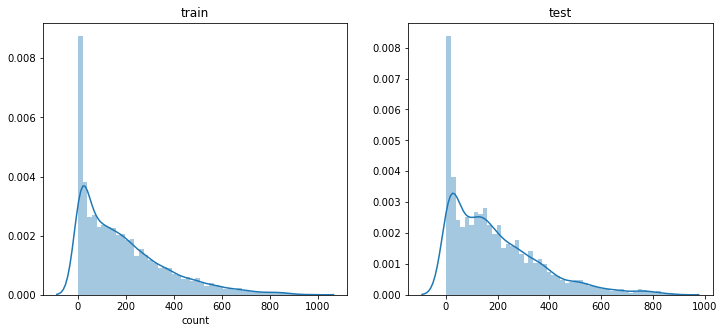

In [127]:
warnings.filterwarnings('ignore')
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(y_rf,ax=ax2,bins=50)
ax2.set(title="test")

### LinearRegressor

In [128]:
lr = LinearRegression()
%time score = cross_val_score(lr, x_train, y_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
print("Score= {0:.5f}".format(score))

#accuracy
results = cross_val_score(lr, x_train, y_train, cv=k_fold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Wall time: 263 ms
Score= nan
Accuracy: 38.75% (1.85%)


In [129]:
# 학습시킴, 피팅(옷을 맞출 때 사용하는 피팅을 생각함) - 피처와 레이블을 넣어주면 알아서 학습을 함
lr.fit(x_train, y_train)

LinearRegression()

In [130]:
# 예측
y_lr = lr.predict(y_test)

print(y_lr.shape)
y_lr[0:10]

(6493,)


array([-21.93483226, -14.25219133, 101.77343079,  77.3297162 ,
       111.30348624, 137.08059687, 114.87800249, -11.46586047,
         0.16735535,  30.29858772])

[Text(0.5, 1.0, 'test')]

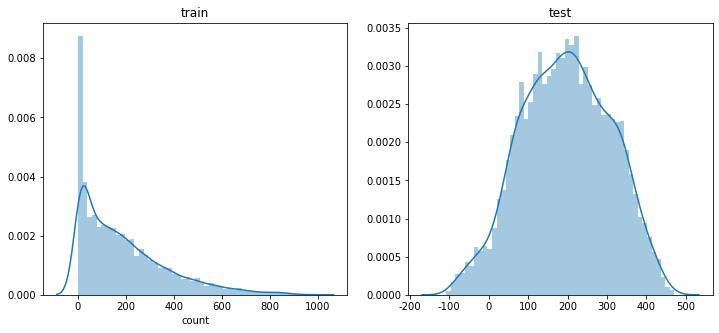

In [131]:
warnings.filterwarnings('ignore')
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(y_lr,ax=ax2,bins=50)
ax2.set(title="test")

### xgboost

* 첫번째 방법 : 모든 category 컬럼들을 int, float으로 형변환

In [132]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 5 to 10862
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10886 non-null  category
 1   holiday     10886 non-null  category
 2   workingday  10886 non-null  category
 3   weather     10886 non-null  category
 4   temp        10886 non-null  float64 
 5   atemp       10886 non-null  float64 
 6   humidity    10886 non-null  int64   
 7   windspeed   10886 non-null  float64 
 8   year        10886 non-null  category
 9   month       10886 non-null  category
 10  day         10886 non-null  category
 11  hour        10886 non-null  category
dtypes: category(8), float64(3), int64(1)
memory usage: 512.9 KB


In [133]:
x_train_xgb_num = x_train
y_train_xgb_num = y_train
y_test_xgb_num = y_test

In [134]:
y_train_xgb_num.shape

(10886,)

In [135]:
x_train_xgb_num['season'] = pd.to_numeric(x_train['season'])
x_train_xgb_num['holiday'] = pd.to_numeric(x_train['holiday'])
x_train_xgb_num['workingday'] = pd.to_numeric(x_train['workingday'])
x_train_xgb_num['weather'] = pd.to_numeric(x_train['weather'])
x_train_xgb_num['year'] = pd.to_numeric(x_train['year'])
x_train_xgb_num['month'] = pd.to_numeric(x_train['month'])
x_train_xgb_num['day'] = pd.to_numeric(x_train['day'])
x_train_xgb_num['hour'] = pd.to_numeric(x_train['hour'])
y_test_xgb_num['season'] = pd.to_numeric(y_test['season'])
y_test_xgb_num['holiday'] = pd.to_numeric(y_test['holiday'])
y_test_xgb_num['workingday'] = pd.to_numeric(y_test['workingday'])
y_test_xgb_num['weather'] = pd.to_numeric(y_test['weather'])
y_test_xgb_num['year'] = pd.to_numeric(y_test['year'])
y_test_xgb_num['month'] = pd.to_numeric(y_test['month'])
y_test_xgb_num['day'] = pd.to_numeric(y_test['day'])
y_test_xgb_num['hour'] = pd.to_numeric(y_test['hour'])

In [136]:
x_train_xgb_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 5 to 10862
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   year        10886 non-null  int64  
 9   month       10886 non-null  int64  
 10  day         10886 non-null  int64  
 11  hour        10886 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 1.1 MB


In [137]:
import xgboost

In [138]:
xgb_num = xgboost.XGBRegressor(n_estimators=100,
                               learning_rate=0.08, gamma=0,
                               subsample=0.75,
                               colsample_bytree=1,
                               max_depth=7)
%time score = cross_val_score(xgb_num, x_train_xgb_num,y_train_xgb_num, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
print("Score= {0:.5f}".format(score))

#accuracy
results = cross_val_score(xgb_num, x_train_xgb_num, y_train_xgb_num, cv=k_fold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Wall time: 4.67 s
Score= nan
Accuracy: 95.14% (0.39%)


* 어엉???????!?!?!!?!?!

In [139]:
#여기서 xgboost는 내부적으로 XGBoost 모델은 모든 문제를 숫자 값만 입력으로 취하는 회귀 예측 모델이라는 걸 알았음
#바꾸는 방법 1.pd.to_numeric, 2.labelencoder
xgb_num.fit(x_train_xgb_num,y_train_xgb_num)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [140]:
y_test_xgb_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6493 entries, 1 to 6492
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      6493 non-null   int64  
 1   holiday     6493 non-null   int64  
 2   workingday  6493 non-null   int64  
 3   weather     6493 non-null   int64  
 4   temp        6493 non-null   float64
 5   atemp       6493 non-null   float64
 6   humidity    6493 non-null   int64  
 7   windspeed   6493 non-null   float64
 8   year        6493 non-null   int64  
 9   month       6493 non-null   int64  
 10  day         6493 non-null   int64  
 11  hour        6493 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 659.4 KB


In [141]:
# 예측
y_xgb_num = xgb_num.predict(y_test_xgb_num)

print(y_xgb_num.shape)
y_xgb_num[0:10]

(6493,)


array([  5.616786,   2.675904,  77.977325, 111.32488 , 103.0606  ,
        91.55208 ,  27.097065,  83.14874 , 199.49124 , 116.713844],
      dtype=float32)

[Text(0.5, 1.0, 'test')]

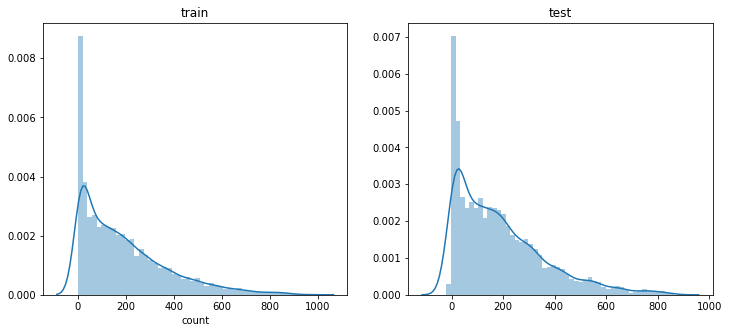

In [142]:
warnings.filterwarnings('ignore')
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(y_xgb_num,ax=ax2,bins=50)
ax2.set(title="test")

* GridSearchCV 써보기

In [149]:
from sklearn.model_selection import GridSearchCV

In [160]:
xgb_gcv=xgboost.XGBClassifier()

In [164]:
gcv = GridSearchCV(xgb_gcv,       # estimator
            param_grid={'n_estimators':[100],
                        'learning_rate':[0.08],
                        'gamma':[0],
                        'subsample':[0.75],
                        'colsample_bytree':[1,2,3],
                        'max_depth':[6,7,8],
                        } , # 찾고자하는 파라미터. dict형식
            cv=k_fold,
            scoring=rmsle_scorer,  
            n_jobs= 4,     # 병렬 처리갯수? -1은 전부)
            refit=True     # default가 True. 
                           # 좋은 estimator로 수정되어짐.
            )   
gcv

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, mono...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                          

In [165]:
gcv.fit(x_train,y_train)   # train_X, train_Y 
gcv.best_params_           # 좋은 파라미터를 보여줌.
gcv.best_score_            

0.6747866715568626

In [166]:
print(gcv.best_params_ )

{'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.08, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.75}


In [167]:
print(gcv.best_score_)

0.6747866715568626


In [169]:
# 예측방법1
xgb_gcv_best=gcv.best_estimator_ # 최적의 파라미터로 모델 생성
y_xgb_gcv_best = xgb_gcv_best.predict(y_test)     # refit=True이기때문에 좋은 estimator로
y_xgb_gcv_best                                    # 수정되어졌으므로 바로 예측에 적용할 수 있다.

* 파라미터 최적화한 xgboost 모델과 정확도 비교

In [180]:
#accuracy
results = cross_val_score(xgb_gcv_best, x_train_xgb_num, y_train_xgb_num, cv=k_fold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 2.11% (0.25%)


* 어엉????

[Text(0.5, 1.0, 'test')]

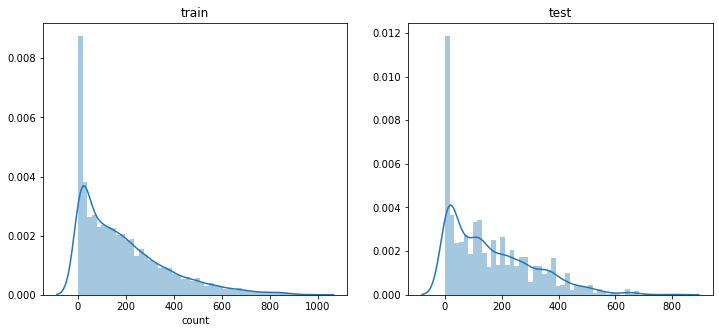

In [170]:
warnings.filterwarnings('ignore')
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(y_xgb_gcv_best,ax=ax2,bins=50)
ax2.set(title="test")

In [ ]:
# 예측방법2
gcv.predict(y_test)             # 학습후 최적의 파라미터로 예측한다.